# Machine Learning Classification

### Classify the malignancy of breast cancer tumor
#### Improve existing models by adding additional model parameters

In [1]:
#pip install numpy
#pip install pandas
#pip install sklearn

## Import Libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


## Load Dataset

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 
                'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 
                'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter', 
                'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points', 
                'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 
                'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 
                'Worst Symmetry', 'Worst Fractal Dimension']
data = pd.read_csv(url, names=column_names)

# Prepare data
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis'].map({'M': 1, 'B': 0})  # Encoding diagnosis as 1 (Malignant) and 0 (Benign)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Independent Variables

In [4]:
X

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Dependent Variable: Benign or Malignant

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

## Scale dataset

In [6]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:
model1=LogisticRegression()
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}\n")

Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        67
   Malignant       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114




## Decision Trees
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
model2= DecisionTreeClassifier()
model2.fit(X_train_scaled, y_train)
y_pred = model2.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}\n")

Accuracy: 0.9035
Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.87      0.91        67
   Malignant       0.83      0.96      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114




## Random Forests
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [9]:
model3=RandomForestClassifier()
model3.fit(X_train_scaled, y_train)
y_pred = model3.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}\n")

Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97        67
   Malignant       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114




## Support Vectorss
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [10]:
model4=SVC()
model4.fit(X_train_scaled, y_train)
y_pred = model4.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}\n")

Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        67
   Malignant       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




## Plot best model coefficients

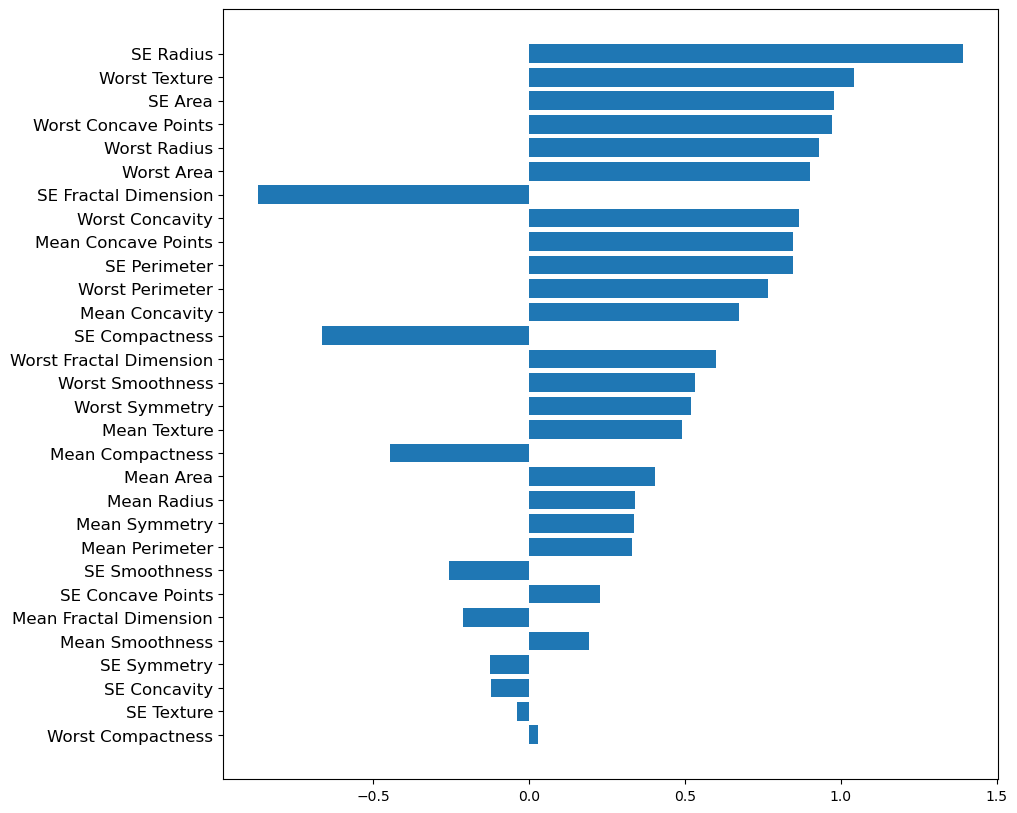

In [11]:
names=X.columns
imp=model1.coef_
imp=imp.reshape(-1)
impa=abs(imp)
imp2, imp1,  names= zip(*sorted(zip(impa, imp,  names)))
rn=list(range(len(names)))
rn=np.asarray(rn)
plt.figure(figsize=(10,10))
plt.barh(rn, imp1, align='center')
plt.yticks(rn, names,fontsize=12)
plt.show()